# Introduciton and Scope: AI Agent as Data Scientist Assistant
## Manual Analysis of Data for baseline comparison of AI Agent results
 

## Setup and Prerequisites (provided in labs)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data for Analysis
Building the Slolom Data Set without AI Agent Agent Assistance
Next version add (1) Google Search as a tool to acquire data (2) LLM to gen Python to import data into db Table or panda dataframe.

Data from [FIS](https://www.fis-ski.com/DB/general/results.html?sectorcode=AL&competitorid=174158&raceid=123171#down:~:text=Results%2C%20Analysis%2C%20Standings-,Download,-(1.33%20MB))

In [2]:
# Data for Women's Slalom Top 20 - Sun Valley 2025
womens_results = [
    ["Mikaela Shiffrin", "USA", 52.00, 53.92, 105.92],
    ["Lena Dürr", "GER", 52.50, 54.55, 107.05],
    ["Andreja Slokar", "SLO", 52.80, 54.50, 107.30],
    ["Katharina Liensberger", "AUT", 53.00, 54.60, 107.60],
    ["Camille Rast", "SUI", 53.20, 54.70, 107.90],
    ["Wendy Holdener", "SUI", 53.40, 54.80, 108.20],
    ["Anna Swenn-Larsson", "SWE", 53.60, 54.90, 108.50],
    ["Michelle Gisin", "SUI", 53.80, 55.00, 108.80],
    ["Sara Hector", "SWE", 54.00, 55.10, 109.10],
    ["Zrinka Ljutić", "CRO", 54.20, 55.20, 109.40],
    ["Katharina Truppe", "AUT", 54.40, 55.30, 109.70],
    ["Katharina Huber", "AUT", 54.60, 55.40, 110.00],
    ["Mina Fürst Holtmann", "NOR", 54.80, 55.50, 110.30],
    ["Cornelia Öhlund", "SWE", 55.00, 55.60, 110.60],
    ["Emma Aicher", "GER", 55.20, 55.70, 110.90],
    ["Laurence St-Germain", "CAN", 55.40, 55.80, 111.20],
    ["Marie Lamure", "FRA", 55.60, 55.90, 111.50],
    ["Neja Dvornik", "SLO", 55.80, 56.00, 111.80],
    ["Hanna Aronsson Elfman", "SWE", 56.00, 56.10, 112.10],
    ["Ali Nullmeyer", "CAN", 56.20, 56.30, 112.50],
]

mens_results = [
    ["Timon Haugan", "NOR", "1:00.45", "1:00.12", "2:00.57"],
    ["Clément Noël", "FRA", "1:00.50", "1:00.10", "2:00.60"],
    ["Fabio Gstrein", "AUT", "1:00.70", "1:00.30", "2:01.00"],
    ["Henrik Kristoffersen", "NOR", "1:00.80", "1:00.40", "2:01.20"],
    ["Loïc Meillard", "SUI", "1:01.00", "1:00.50", "2:01.50"],
    ["Lucas Pinheiro Braathen", "BRA", "1:01.10", "1:00.60", "2:01.70"],
    ["Daniel Yule", "SUI", "1:01.20", "1:00.70", "2:01.90"],
    ["Manuel Feller", "AUT", "1:01.30", "1:00.80", "2:02.10"],
    ["Alex Vinatzer", "ITA", "1:01.40", "1:00.90", "2:02.30"],
    ["Sebastian Foss-Solevåg", "NOR", "1:01.50", "1:01.00", "2:02.50"],
    ["Ramon Zenhäusern", "SUI", "1:01.60", "1:01.10", "2:02.70"],
    ["Dave Ryding", "GBR", "1:01.70", "1:01.20", "2:02.90"],
    ["Albert Popov", "BUL", "1:01.80", "1:01.30", "2:03.10"],
    ["Giuliano Razzoli", "ITA", "1:01.90", "1:01.40", "2:03.30"],
    ["Erik Read", "CAN", "1:02.00", "1:01.50", "2:03.50"],
    ["Jett Seymour", "USA", "1:02.10", "1:01.60", "2:03.70"],
    ["Filip Zubčić", "CRO", "1:02.20", "1:01.70", "2:03.90"],
    ["Stefan Hadalin", "SLO", "1:02.30", "1:01.80", "2:04.10"],
    ["River Radamus", "USA", "1:02.40", "1:01.90", "2:04.30"],
]


## Python Data Frames

In [3]:
dfM = pd.DataFrame(mens_results, columns=["Name", "Country", "Run1", "Run2", "TotalTime"])
dfW = pd.DataFrame(womens_results, columns=["Name", "Country", "Run1", "Run2", "TotalTime"])

# print(dfW)

### Convert Text Times to time seconds

In [17]:
from time_utils import time_to_seconds 
#Men
dfM["Run1_sec"] = dfM["Run1"].apply(time_to_seconds)
dfM["Run2_sec"] = dfM["Run2"].apply(time_to_seconds)
dfM["TotalTime_sec"] = dfM["TotalTime"].apply(time_to_seconds)


In [ ]:
#Women
dfW["Run1_sec"] = dfW["Run1"].apply(time_to_seconds)
dfW["Run2_sec"] = dfW["Run2"].apply(time_to_seconds)
dfW["TotalTime_sec"] = dfW["TotalTime"].apply(time_to_seconds)


## Statistical Tests
### Import Statistical and Plotting Libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Side by Side Box Plots

In [19]:
dfW.head(4)

,Name,Country,Run1,Run2,TotalTime
0,Mikaela Shiffrin,USA,52.0,53.92,105.92
1,Lena Dürr,GER,52.5,54.55,107.05
2,Andreja Slokar,SLO,52.8,54.50,107.30
3,Katharina Liensberger,AUT,53.0,54.60,107.60


In [27]:
# Combine into one DataFrame
combined = pd.DataFrame({
    'TotalTime_sec': dfM['TotalTime_sec'].tolist() + dfW['TotalTime'].tolist(),
    'Team': ['Men'] * len(dfM) + ['Women'] * len(dfW)
})

# print(combined)

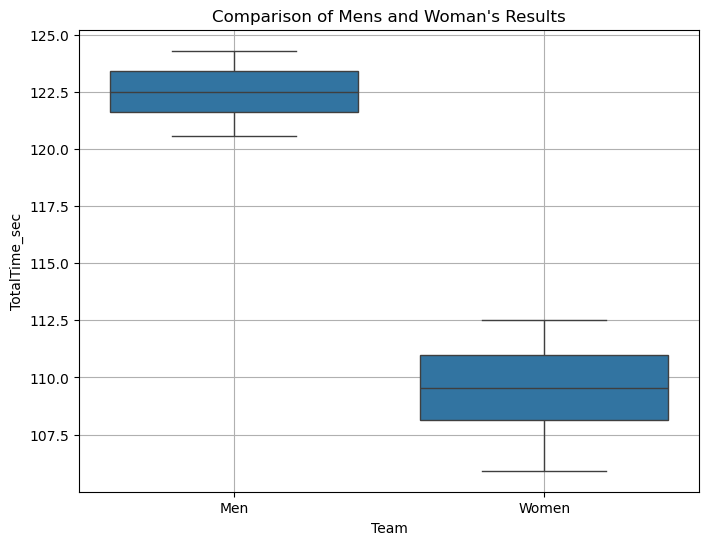

In [29]:

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Team', y='TotalTime_sec', data=combined)
plt.title("Comparison of Mens and Woman's Results")
plt.grid(True)
plt.show()

It seems there is greater variance amonst the women

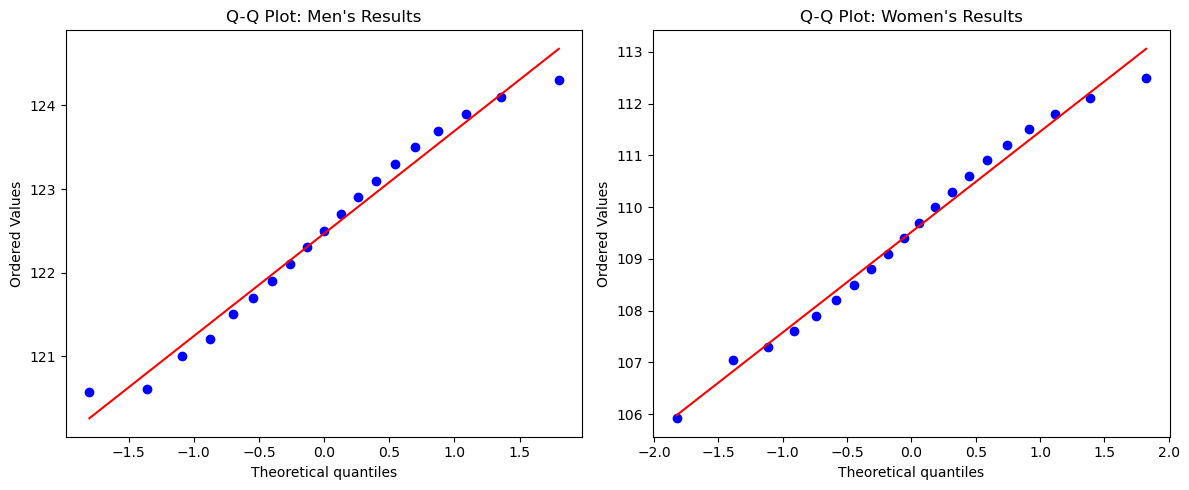

In [30]:
# Q-Q Plot for Men
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(dfM['TotalTime_sec'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Men's Results")

# Q-Q Plot for df2
plt.subplot(1, 2, 2)
stats.probplot(dfW['TotalTime'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Women's Results")

plt.tight_layout()
plt.show()

### Testing for Normality Shapiro-Wilk Test

In [31]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

stat1, p1 = shapiro(dfM['TotalTime_sec'])
stat2, p2 = shapiro(dfW['TotalTime'])

print(f"Mens: p={p1}")
print(f"Womens: p={p2}")

if p1 > 0.05:
    print("Men looks normal (fail to reject H0)")
else:
    print("Men not normal (reject H0)")

if p2 > 0.05:
    print("Women looks normal (fail to reject H0)")
else:
    print("Women not normal (reject H0)")

Mens: p=0.5854042674875388
Womens: p=0.8895565286568422
Men looks normal (fail to reject H0)
Women looks normal (fail to reject H0)


### Descriptive Statistics

In [35]:
from custom_stats import full_desc
Dstats_dfM = full_desc(dfM['TotalTime_sec'])
Dstats_dfW = full_desc(dfW['TotalTime'])

# Combine into one DataFrame
comparison = pd.concat([Dstats_dfM, Dstats_dfW], axis=1)
comparison.columns = ['Men', 'Women']

# Display
print(comparison)

                 Men       Women
Count      19.000000   20.000000
Mean      122.466842  109.518500
Median    122.500000  109.550000
Std Dev     1.175065    1.852623
Variance    1.380778    3.432213
Min       120.570000  105.920000
Max       124.300000  112.500000
Range       3.730000    6.580000
IQR         1.800000    2.850000
Skewness   -0.105126   -0.138324


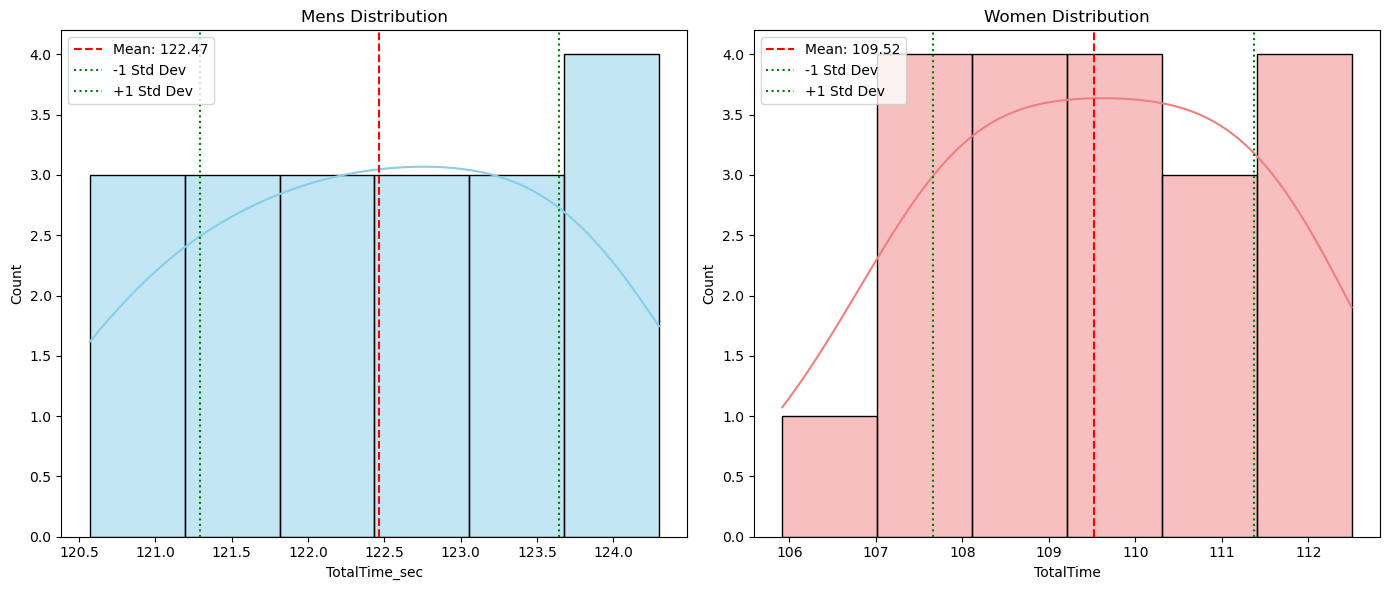

In [38]:
# Create a subplot: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Dataset 1
sns.histplot(dfM['TotalTime_sec'], kde=True, ax=axes[0], color="skyblue")
mean1 = dfM['TotalTime_sec'].mean()
std1 = dfM['TotalTime_sec'].std()
axes[0].axvline(mean1, color='red', linestyle='--', label=f'Mean: {mean1:.2f}')
axes[0].axvline(mean1 - std1, color='green', linestyle=':', label=f'-1 Std Dev')
axes[0].axvline(mean1 + std1, color='green', linestyle=':', label=f'+1 Std Dev')
axes[0].set_title('Mens Distribution')
axes[0].legend()

# Plot for Dataset 2
sns.histplot(dfW['TotalTime'], kde=True, ax=axes[1], color="lightcoral")
mean2 = dfW['TotalTime'].mean()
std2 = dfW['TotalTime'].std()
axes[1].axvline(mean2, color='red', linestyle='--', label=f'Mean: {mean2:.2f}')
axes[1].axvline(mean2 - std2, color='green', linestyle=':', label=f'-1 Std Dev')
axes[1].axvline(mean2 + std2, color='green', linestyle=':', label=f'+1 Std Dev')
axes[1].set_title('Women Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

### Author  
**Shannon O'Donovan**  
Data Science | AI & Salesforce Architect  
📧 [shannon.od3.dev@gmail.com](mailto:shannon.od3.dev@gmail.com)  
🌐 [linkedin.com/in/shannonodonovan](https://linkedin.com/in/shannonodonovan)  
